In [ ]:
!pip install fasttext
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313497 sha256=e98074d0c3f691de538fcf20952aa476c48198b659cb0bc5fa9d837f6ae6cf3a
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently ta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class FastTextWrapper:
    def __init__(self, bin_path):
        self.model = fasttext.load_model(bin_path)

    def predict_proba(self, texts):
        if isinstance(texts, np.ndarray):
            texts = texts.tolist()
        elif isinstance(texts, str):
            texts = [texts]

        # Get predictions
        labels_list, probs_list = self.model.predict(texts, k=1)  # only top guess
        output = []
        for labels, probs in zip(labels_list, probs_list):
            p = probs[0]
            if labels[0] == "__label__spam":
                output.append([1 - p, p])  # ham, spam
            else:
                output.append([p, 1 - p])
        return np.array(output)

Promo Win a free iPhone 14! Reply WIN to claim now!
Alert Your account is locked! Call 1-800-555-1234 to verify.
Lucky You're our lucky winner! Reply PRIZE for $1000!
Bank Urgent: Your card is suspended. Call 1-888-555-6789.
Gift $500 gift card waiting! Text GIFT to claim.
Survey Take our survey, win a cruise! Reply SURVEY.
Shop 50% off all electronics! Text SHOP to save big!
Loan Instant $5000 loan! Reply LOAN to apply.
Travel Free vacation package! Text TRAVEL to book.
Health Lose 20 lbs fast! Reply DIET for free pills.
Job Earn $500/day from home! Text JOB to start.
Charity Donate $10 to save lives! Reply GIVE now.
No Spam IRS alert: You owe $2000. Call 1-800-555-9876.
Car Your car warranty expires soon! Reply AUTO to extend.
Free Free Netflix for 1 year! Text MOVIE to subscribe.
Credit Fix your credit score! Reply CREDIT for help.
Prize You won a Tesla! Text TESLA to claim.
Sale Flash sale! 70% off shoes, reply SALE now!
Invest Invest $100, earn $1000! Text INVEST to start.
Alert2 

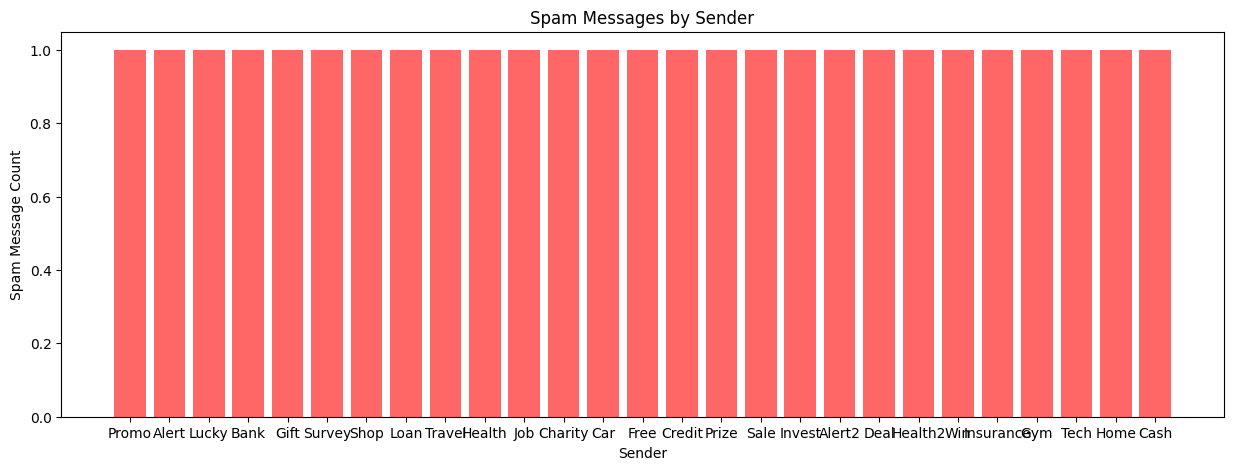

Sender: Promo, Spam Count: 1
Sender: Alert, Spam Count: 1
Sender: Lucky, Spam Count: 1
Sender: Bank, Spam Count: 1
Sender: Gift, Spam Count: 1
Sender: Survey, Spam Count: 1
Sender: Shop, Spam Count: 1
Sender: Loan, Spam Count: 1
Sender: Travel, Spam Count: 1
Sender: Health, Spam Count: 1
Sender: Job, Spam Count: 1
Sender: Charity, Spam Count: 1
Sender: Car, Spam Count: 1
Sender: Free, Spam Count: 1
Sender: Credit, Spam Count: 1
Sender: Prize, Spam Count: 1
Sender: Sale, Spam Count: 1
Sender: Invest, Spam Count: 1
Sender: Alert2, Spam Count: 1
Sender: Deal, Spam Count: 1
Sender: Health2, Spam Count: 1
Sender: Win, Spam Count: 1
Sender: Insurance, Spam Count: 1
Sender: Gym, Spam Count: 1
Sender: Tech, Spam Count: 1
Sender: Home, Spam Count: 1
Sender: Cash, Spam Count: 1


In [ ]:
import fasttext
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import joblib


def process_sms_data(sms_data):
    model = fasttext.load_model("/content/drive/MyDrive/Colab Notebooks/SmsSpamProject/spam_fasttext_model.bin")
    # List to store spam messages
    spam_senders = []

    # Classify each message
    for sms in sms_data:
        text = sms["sms_text"]
        sender = sms["from"]
        prediction = model.predict(text)
        label = "spam" if prediction[0][0] == "__label__spam" else "ham"

        # If spam, add sender to list
        if label == "spam":
            print(sender + " " + text)
            spam_senders.append(sender)
        else:
          print("No Spam " + text)
    print(len(spam_senders))
    # Count spam messages per sender
    spam_counts = Counter(spam_senders)
    # Plot histogram
    if spam_counts:
        senders = list(spam_counts.keys())
        counts = list(spam_counts.values())

        plt.figure(figsize=(15, 5))
        plt.bar(senders, counts, color="red", alpha=0.6)
        plt.xlabel("Sender")
        plt.ylabel("Spam Message Count")
        plt.title("Spam Messages by Sender")
        plt.show()

    # Return list of dictionaries with spam senders and their counts
    return [{"sender": sender, "spam_count": count} for sender, count in spam_counts.items()]



results = process_sms_data(sms_data)
for result in results:
    print(f"Sender: {result['sender']}, Spam Count: {result['spam_count']}")

Promo Win a free iPhone 14! Reply WIN to claim now!
Alert Your account is locked! Call 1-800-555-1234 to verify.
Lucky You're our lucky winner! Reply PRIZE for $1000!
Bank Urgent: Your card is suspended. Call 1-888-555-6789.
Gift $500 gift card waiting! Text GIFT to claim.
Survey Take our survey, win a cruise! Reply SURVEY.
Shop 50% off all electronics! Text SHOP to save big!
Loan Instant $5000 loan! Reply LOAN to apply.
Travel Free vacation package! Text TRAVEL to book.
Health Lose 20 lbs fast! Reply DIET for free pills.
Job Earn $500/day from home! Text JOB to start.
Charity Donate $10 to save lives! Reply GIVE now.
Tax IRS alert: You owe $2000. Call 1-800-555-9876.
Car Your car warranty expires soon! Reply AUTO to extend.
Free Free Netflix for 1 year! Text MOVIE to subscribe.
Credit Fix your credit score! Reply CREDIT for help.
Prize You won a Tesla! Text TESLA to claim.
Sale Flash sale! 70% off shoes, reply SALE now!
Invest Invest $100, earn $1000! Text INVEST to start.
Alert2 PayP

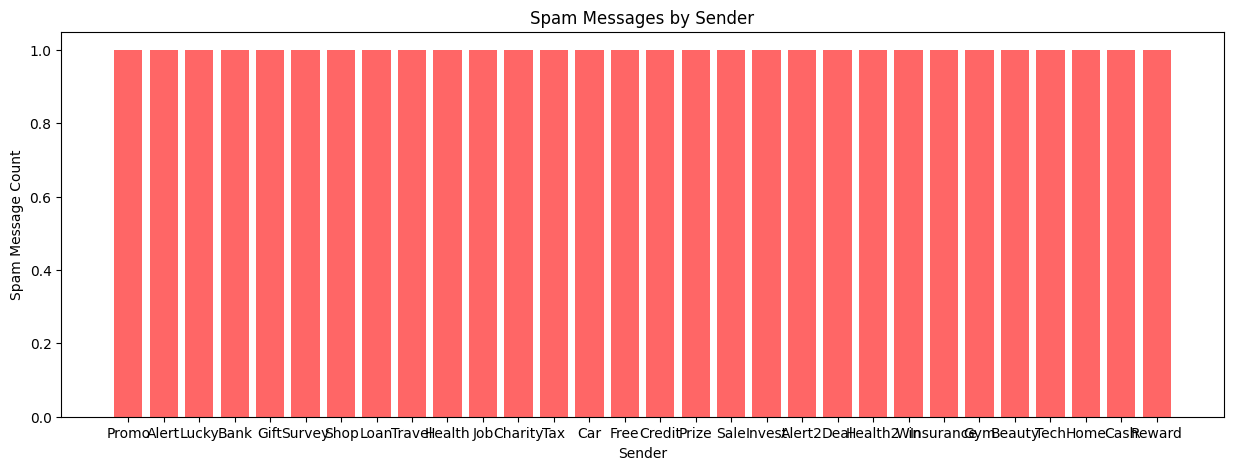

Sender: Promo, Spam Count: 1
Sender: Alert, Spam Count: 1
Sender: Lucky, Spam Count: 1
Sender: Bank, Spam Count: 1
Sender: Gift, Spam Count: 1
Sender: Survey, Spam Count: 1
Sender: Shop, Spam Count: 1
Sender: Loan, Spam Count: 1
Sender: Travel, Spam Count: 1
Sender: Health, Spam Count: 1
Sender: Job, Spam Count: 1
Sender: Charity, Spam Count: 1
Sender: Tax, Spam Count: 1
Sender: Car, Spam Count: 1
Sender: Free, Spam Count: 1
Sender: Credit, Spam Count: 1
Sender: Prize, Spam Count: 1
Sender: Sale, Spam Count: 1
Sender: Invest, Spam Count: 1
Sender: Alert2, Spam Count: 1
Sender: Deal, Spam Count: 1
Sender: Health2, Spam Count: 1
Sender: Win, Spam Count: 1
Sender: Insurance, Spam Count: 1
Sender: Gym, Spam Count: 1
Sender: Beauty, Spam Count: 1
Sender: Tech, Spam Count: 1
Sender: Home, Spam Count: 1
Sender: Cash, Spam Count: 1
Sender: Reward, Spam Count: 1


In [ ]:
ft_model = fasttext.train_unsupervised("corpus.txt", model='skipgram')
def get_sentence_vector(text):
    return ft_model.get_sentence_vector(text)

def process_sms_data(sms_data, model_name):
    model = joblib.load(model_name)
    # List to store spam messages
    spam_senders = []

    # Classify each message
    for sms in sms_data:
        text = sms["sms_text"]
        sender = sms["from"]
        prediction = model.predict_proba([get_sentence_vector(text)])
        label = "spam" if prediction[0][1] >= 0.5 else "ham"

        # If spam, add sender to list
        if label == "spam":
            print(sender + " " + text)
            spam_senders.append(sender)
        else:
          print("No Spam " + text)
    print(len(spam_senders))
    # Count spam messages per sender
    spam_counts = Counter(spam_senders)
    # Plot histogram
    if spam_counts:
        senders = list(spam_counts.keys())
        counts = list(spam_counts.values())

        plt.figure(figsize=(15, 5))
        plt.bar(senders, counts, color="red", alpha=0.6)
        plt.xlabel("Sender")
        plt.ylabel("Spam Message Count")
        plt.title("Spam Messages by Sender")
        plt.show()

    # Return list of dictionaries with spam senders and their counts
    return [{"sender": sender, "spam_count": count} for sender, count in spam_counts.items()]



results = process_sms_data(sms_data, "svm_model.pkl")
for result in results:
    print(f"Sender: {result['sender']}, Spam Count: {result['spam_count']}")

In [ ]:
sms_data = [
    {"from": "Promo", "sms_text": "Win a free iPhone 14! Reply WIN to claim now!"},
    {"from": "Alert", "sms_text": "Your account is locked! Call 1-800-555-1234 to verify."},
    {"from": "Lucky", "sms_text": "You're our lucky winner! Reply PRIZE for $1000!"},
    {"from": "Bank", "sms_text": "Urgent: Your card is suspended. Call 1-888-555-6789."},
    {"from": "Gift", "sms_text": "$500 gift card waiting! Text GIFT to claim."},
    {"from": "Survey", "sms_text": "Take our survey, win a cruise! Reply SURVEY."},
    {"from": "Shop", "sms_text": "50% off all electronics! Text SHOP to save big!"},
    {"from": "Loan", "sms_text": "Instant $5000 loan! Reply LOAN to apply."},
    {"from": "Travel", "sms_text": "Free vacation package! Text TRAVEL to book."},
    {"from": "Health", "sms_text": "Lose 20 lbs fast! Reply DIET for free pills."},
    {"from": "Job", "sms_text": "Earn $500/day from home! Text JOB to start."},
    {"from": "Charity", "sms_text": "Donate $10 to save lives! Reply GIVE now."},
    {"from": "Tax", "sms_text": "IRS alert: You owe $2000. Call 1-800-555-9876."},
    {"from": "Car", "sms_text": "Your car warranty expires soon! Reply AUTO to extend."},
    {"from": "Free", "sms_text": "Free Netflix for 1 year! Text MOVIE to subscribe."},
    {"from": "Credit", "sms_text": "Fix your credit score! Reply CREDIT for help."},
    {"from": "Prize", "sms_text": "You won a Tesla! Text TESLA to claim."},
    {"from": "Sale", "sms_text": "Flash sale! 70% off shoes, reply SALE now!"},
    {"from": "Invest", "sms_text": "Invest $100, earn $1000! Text INVEST to start."},
    {"from": "Alert2", "sms_text": "PayPal account issue! Call 1-888-555-4321 now."},
    {"from": "Deal", "sms_text": "Free laptop giveaway! Reply LAPTOP to claim."},
    {"from": "Health2", "sms_text": "Cure pain instantly! Text PAIN for free trial."},
    {"from": "Win", "sms_text": "Finalist for $1M prize! Reply WINNER now."},
    {"from": "Insurance", "sms_text": "Cheap car insurance! Text QUOTE for rates."},
    {"from": "Gym", "sms_text": "Free gym membership! Reply FIT to sign up."},
    {"from": "Beauty", "sms_text": "Anti-aging cream trial! Text SKIN to order."},
    {"from": "Tech", "sms_text": "Upgrade your phone plan! Reply TECH to save."},
    {"from": "Home", "sms_text": "Free home security! Text SAFE to install."},
    {"from": "Cash", "sms_text": "Get $1000 cash advance! Reply CASH now."},
    {"from": "Reward", "sms_text": "Earn reward points! Text REWARD to join."}
]

In [ ]:
sms_data = [
    {"from": "Alice", "sms_text": "Win a free iPhone now, click here!"},
    {"from": "Bob", "sms_text": "Hey, let's meet at 5 PM."},
    {"from": "Alice", "sms_text": "Urgent: Claim your prize at http://example.com"},
    {"from": "Charlie", "sms_text": "Reminder: Dentist appointment tomorrow."},
    {"from": "Alice", "sms_text": "Get rich quick! Visit now!"},
    {"from": "Bob", "sms_text": "Lunch tomorrow?"},
    {"from": "Dave", "sms_text": "Free gift card, claim now!"},
    {"from": "Emma", "sms_text": "Congratulations! You won a $500 voucher, click http://win.com to claim!"},
    {"from": "Frank", "sms_text": "Can you call me back when you’re free?"},
    {"from": "Grace", "sms_text": "Exclusive offer: 50% off today only, visit http://sale.com!"},
    {"from": "Henry", "sms_text": "Meeting rescheduled to 3 PM, see you then."},
    {"from": "Isabel", "sms_text": "Act fast! Limited time deal on electronics, http://dealz.com."},
    {"from": "Jack", "sms_text": "Hey, want to grab coffee this weekend?"},
    {"from": "Kelly", "sms_text": "Win a trip to Hawaii, enter now at http://travelwin.com!"},
    {"from": "Liam", "sms_text": "Don’t forget to submit your report by Friday."},
    {"from": "Mia", "sms_text": "Flash sale: Get your free trial now at http://tryfree.com!"},
    {"from": "Noah", "sms_text": "Can we discuss the project timeline tomorrow?"},
    {"from": "Olivia", "sms_text": "You’re pre-approved for a $1000 loan, apply at http://loan.com!"},
    {"from": "Peter", "sms_text": "Reminder: Team lunch at 1 PM today."},
    {"from": "Quinn", "sms_text": "Unlock exclusive rewards, click http://rewards.com now!"},
    {"from": "Rachel", "sms_text": "Hey, are you free to chat this evening?"},
    {"from": "Sam", "sms_text": "Hurry! Last chance to win a gift card at http://gift.com!"},
    {"from": "Tara", "sms_text": "Can you send me the meeting notes?"},
    {"from": "Uma", "sms_text": "Free shipping on all orders today, shop now at http://shop.com!"},
    {"from": "Victor", "sms_text": "Let’s plan the team outing for next week."},
    {"from": "Wendy", "sms_text": "You’ve been selected for a free trial, click http://freebie.com!"},
    {"from": "Xavier", "sms_text": "Reminder: Doctor’s appointment at 2 PM tomorrow."},
    {"from": "Yara", "sms_text": "Claim your $200 voucher now at http://voucher.com!"},
    {"from": "Zane", "sms_text": "Can we meet to discuss the budget?"},
    {"from": "Alice", "sms_text": "Exclusive deal! Save 70% on your next purchase, visit http://savebig.com now!"},
    {"from": "Bob", "sms_text": "Hey, just checking if you’re still coming to the party."},
    {"from": "Charlie", "sms_text": "Your package will arrive tomorrow by 5 PM."},
    {"from": "Dave", "sms_text": "Win a luxury cruise, enter now at http://cruisewin.com!"},
    {"from": "Emma", "sms_text": "Can you review the document I sent you?"},
    {"from": "Frank", "sms_text": "Get a free consultation today, visit http://consult.com!"},
    {"from": "Grace", "sms_text": "Let’s catch up over dinner this weekend."},
    {"from": "Henry", "sms_text": "Urgent: Claim your $1000 prize at http://bigwin.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Project deadline is next Monday."},
    {"from": "Jack", "sms_text": "Free gift with purchase, shop now at http://giftshop.com!"},
    {"from": "Kelly", "sms_text": "Are you available for a quick call?"},
    {"from": "Liam", "sms_text": "Win a new car, enter now at http://carwin.com!"},
    {"from": "Mia", "sms_text": "Can we reschedule our meeting to 10 AM?"},
    {"from": "Noah", "sms_text": "Limited offer: 30% off, click http://discount.com!"},
    {"from": "Olivia", "sms_text": "Hey, let’s grab lunch tomorrow."},
    {"from": "Peter", "sms_text": "You’re a winner! Claim now at http://winner.com!"},
    {"from": "Quinn", "sms_text": "Reminder: Team meeting at 11 AM tomorrow."},
    {"from": "Rachel", "sms_text": "Free trial for premium membership, sign up at http://premium.com!"},
    {"from": "Sam", "sms_text": "Can you send the presentation slides?"},
    {"from": "Tara", "sms_text": "Act now! Get 50% off your order at http://sale.com!"},
    {"from": "Uma", "sms_text": "Let’s discuss the project details tomorrow."},
    {"from": "Victor", "sms_text": "Congratulations! You won a $200 gift card, claim at http://giftcard.com!"},
    {"from": "Wendy", "sms_text": "Hey, are you free this afternoon?"},
    {"from": "Xavier", "sms_text": "Exclusive offer: Free shipping today at http://shopnow.com!"},
    {"from": "Yara", "sms_text": "Can we meet to review the contract?"},
    {"from": "Zane", "sms_text": "Win a vacation package, click http://vacation.com!"},
    {"from": "Alice", "sms_text": "Your subscription is expiring soon, renew now at http://renew.com!"},
    {"from": "Bob", "sms_text": "Just a reminder to pick up the kids at 3 PM."},
    {"from": "Charlie", "sms_text": "Can you confirm your attendance for the meeting?"},
    {"from": "Dave", "sms_text": "Hurry! Last chance for a free trial at http://try.com!"},
    {"from": "Emma", "sms_text": "Let’s plan the team dinner for Friday evening."},
    {"from": "Frank", "sms_text": "You’re pre-approved for a loan, apply at http://loan.com!"},
    {"from": "Grace", "sms_text": "Can you send me the updated schedule?"},
    {"from": "Henry", "sms_text": "Win a $1000 shopping spree, click http://shopwin.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Submit your timesheet by 5 PM."},
    {"from": "Jack", "sms_text": "Free gift card with your next purchase, visit http://gift.com!"},
    {"from": "Kelly", "sms_text": "Are we still meeting at the cafe?"},
    {"from": "Liam", "sms_text": "Exclusive deal! Save 60% today at http://deal.com!"},
    {"from": "Mia", "sms_text": "Can you review my draft by tomorrow?"},
    {"from": "Noah", "sms_text": "Claim your free voucher now at http://voucher.com!"},
    {"from": "Olivia", "sms_text": "Hey, let’s catch up this weekend."},
    {"from": "Peter", "sms_text": "You won a prize! Click http://prize.com to claim!"},
    {"from": "Quinn", "sms_text": "Reminder: Dentist appointment at 2 PM."},
    {"from": "Rachel", "sms_text": "Get 70% off your order, shop now at http://sale.com!"},
    {"from": "Sam", "sms_text": "Can you call me about the project?"},
    {"from": "Tara", "sms_text": "Win a free tablet, enter at http://tabletwin.com!"},
    {"from": "Uma", "sms_text": "Let’s finalize the presentation tomorrow."},
    {"from": "Victor", "sms_text": "Exclusive offer: Free trial at http://tryfree.com!"},
    {"from": "Wendy", "sms_text": "Hey, are you joining us for dinner?"},
    {"from": "Xavier", "sms_text": "Congratulations! Claim your $500 prize at http://win.com!"},
    {"from": "Yara", "sms_text": "Can we discuss the budget this afternoon?"},
    {"from": "Zane", "sms_text": "Free shipping on all orders, shop now at http://shop.com!"},
    {"from": "Alice", "sms_text": "Your account needs verification, click http://verify.com now!"},
    {"from": "Bob", "sms_text": "Reminder: Team meeting at 10 AM tomorrow in the conference room."},
    {"from": "Charlie", "sms_text": "Can you send me the project files by tonight?"},
    {"from": "Dave", "sms_text": "Win a luxury watch, enter now at http://watchwin.com!"},
    {"from": "Emma", "sms_text": "Let’s plan the team outing for next weekend."},
    {"from": "Frank", "sms_text": "Get a free consultation, visit http://consult.com today!"},
    {"from": "Grace", "sms_text": "Are you free to meet this afternoon?"},
    {"from": "Henry", "sms_text": "Urgent: Claim your $200 voucher at http://voucher.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Submit your expense report by Friday."},
    {"from": "Jack", "sms_text": "Free gift with purchase, shop now at http://giftshop.com!"},
    {"from": "Kelly", "sms_text": "Can we reschedule our call to tomorrow?"},
    {"from": "Liam", "sms_text": "Win a new phone, enter now at http://phonewin.com!"},
    {"from": "Mia", "sms_text": "Hey, let’s discuss the project timeline."},
    {"from": "Noah", "sms_text": "Limited offer: 40% off, click http://discount.com!"},
    {"from": "Olivia", "sms_text": "Can you confirm the meeting time?"},
    {"from": "Peter", "sms_text": "You’re a winner! Claim now at http://winner.com!"},
    {"from": "Quinn", "sms_text": "Reminder: Doctor’s appointment at 3 PM."},
    {"from": "Rachel", "sms_text": "Get 50% off your order, shop now at http://sale.com!"},
    {"from": "Sam", "sms_text": "Can you send the updated budget?"},
    {"from": "Tara", "sms_text": "Win a free laptop, enter at http://laptopwin.com!"},
    {"from": "Uma", "sms_text": "Let’s review the contract tomorrow."},
    {"from": "Victor", "sms_text": "Exclusive offer: Free trial at http://tryfree.com!"},
    {"from": "Wendy", "sms_text": "Hey, are you free this evening?"},
    {"from": "Xavier", "sms_text": "Congratulations! Claim your $300 prize at http://win.com!"},
    {"from": "Yara", "sms_text": "Can we meet to discuss the project?"},
    {"from": "Zane", "sms_text": "Free shipping on all orders, shop now at http://shop.com!"},
    {"from": "Alice", "sms_text": "Your account needs urgent attention, click http://verify.com!"},
    {"from": "Bob", "sms_text": "Just checking if you’re coming to the meeting."},
    {"from": "Charlie", "sms_text": "Can you send the presentation by tomorrow?"},
    {"from": "Dave", "sms_text": "Win a luxury vacation, enter now at http://vacation.com!"},
    {"from": "Emma", "sms_text": "Let’s plan the team lunch for next week."},
    {"from": "Frank", "sms_text": "Get a free trial, visit http://try.com today!"},
    {"from": "Grace", "sms_text": "Are you available for a call this afternoon?"},
    {"from": "Henry", "sms_text": "Urgent: Claim your $500 voucher at http://voucher.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Team meeting at 11 AM tomorrow."},
    {"from": "Jack", "sms_text": "Free gift card with purchase, shop now at http://gift.com!"},
    {"from": "Kelly", "sms_text": "Can we discuss the project details?"},
    {"from": "Liam", "sms_text": "Win a new tablet, enter now at http://tabletwin.com!"},
    {"from": "Mia", "sms_text": "Hey, let’s reschedule our meeting."},
    {"from": "Noah", "sms_text": "Limited offer: 50% off, click http://discount.com!"},
    {"from": "Olivia", "sms_text": "Can you confirm your attendance?"},
    {"from": "Peter", "sms_text": "You won a prize! Claim now at http://prize.com!"},
    {"from": "Quinn", "sms_text": "Reminder: Dentist appointment at 1 PM."},
    {"from": "Rachel", "sms_text": "Get 60% off your order, shop now at http://sale.com!"},
    {"from": "Sam", "sms_text": "Can you send the project files?"},
    {"from": "Tara", "sms_text": "Win a free phone, enter at http://phonewin.com!"},
    {"from": "Uma", "sms_text": "Let’s finalize the budget tomorrow."},
    {"from": "Victor", "sms_text": "Exclusive offer: Free trial at http://tryfree.com!"},
    {"from": "Wendy", "sms_text": "Hey, are you joining us for lunch?"},
    {"from": "Xavier", "sms_text": "Congratulations! Claim your $400 prize at http://win.com!"},
    {"from": "Yara", "sms_text": "Can we review the contract this afternoon?"},
    {"from": "Zane", "sms_text": "Free shipping on all orders, shop now at http://shop.com!"},
    {"from": "Alice", "sms_text": "Your account needs verification, click http://verify.com now!"},
    {"from": "Bob", "sms_text": "Reminder: Pick up the kids at 3 PM tomorrow."},
    {"from": "Charlie", "sms_text": "Can you send me the updated schedule?"},
    {"from": "Dave", "sms_text": "Win a luxury car, enter now at http://carwin.com!"},
    {"from": "Emma", "sms_text": "Let’s plan the team outing for next Friday."},
    {"from": "Frank", "sms_text": "Get a free consultation, visit http://consult.com today!"},
    {"from": "Grace", "sms_text": "Are you free to meet this evening?"},
    {"from": "Henry", "sms_text": "Urgent: Claim your $600 voucher at http://voucher.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Submit your timesheet by tomorrow."},
    {"from": "Jack", "sms_text": "Free gift with purchase, shop now at http://giftshop.com!"},
    {"from": "Kelly", "sms_text": "Can we reschedule our call to next week?"},
    {"from": "Liam", "sms_text": "Win a new laptop, enter now at http://laptopwin.com!"},
    {"from": "Mia", "sms_text": "Hey, let’s discuss the project timeline."},
    {"from": "Noah", "sms_text": "Limited offer: 30% off, click http://discount.com!"},
    {"from": "Olivia", "sms_text": "Can you confirm the meeting time?"},
    {"from": "Peter", "sms_text": "You’re a winner! Claim now at http://winner.com!"},
    {"from": "Quinn", "sms_text": "Reminder: Doctor’s appointment at 4 PM."},
    {"from": "Rachel", "sms_text": "Get 70% off your order, shop now at http://sale.com!"},
    {"from": "Sam", "sms_text": "Can you send the presentation slides?"},
    {"from": "Tara", "sms_text": "Win a free tablet, enter at http://tabletwin.com!"},
    {"from": "Uma", "sms_text": "Let’s review the contract tomorrow."},
    {"from": "Victor", "sms_text": "Exclusive offer: Free trial at http://tryfree.com!"},
    {"from": "Wendy", "sms_text": "Hey, are you free this afternoon?"},
    {"from": "Xavier", "sms_text": "Congratulations! Claim your $700 prize at http://win.com!"},
    {"from": "Yara", "sms_text": "Can we meet to discuss the budget?"},
    {"from": "Zane", "sms_text": "Free shipping on all orders, shop now at http://shop.com!"},
    {"from": "Alice", "sms_text": "Your account needs urgent attention, click http://verify.com!"},
    {"from": "Bob", "sms_text": "Just checking if you’re coming to the party."},
    {"from": "Charlie", "sms_text": "Can you send the project files by tomorrow?"},
    {"from": "Dave", "sms_text": "Win a luxury vacation, enter now at http://vacation.com!"},
    {"from": "Emma", "sms_text": "Let’s plan the team lunch for next week."},
    {"from": "Frank", "sms_text": "Get a free trial, visit http://try.com today!"},
    {"from": "Grace", "sms_text": "Are you available for a call this afternoon?"},
    {"from": "Henry", "sms_text": "Urgent: Claim your $800 voucher at http://voucher.com!"},
    {"from": "Isabel", "sms_text": "Reminder: Team meeting at 10 AM tomorrow."},
    {"from": "Jack", "sms_text": "Free gift card with purchase, shop now at http://gift.com!"},
    {"from": "Kelly", "sms_text": "Can we discuss the project details?"},
    {"from": "Liam", "sms_text": "Win a new phone, enter now at http://phonewin.com!"},
    {"from": "Mia", "sms_text": "Hey, let’s reschedule our meeting."},
    {"from": "Noah", "sms_text": "Limited offer: 50% off, click http://discount.com!"},
    {"from": "Olivia", "sms_text": "Can you confirm your attendance?"},
    {"from": "Peter", "sms_text": "You won a prize! Claim now at http://prize.com!"},
    {"from": "Quinn", "sms_text": "Reminder: Dentist appointment at 2 PM."}
]

In [ ]:
sms_data = [
    {"from": "Alice", "sms_text": "Hey, are you free for coffee this afternoon?"},
    {"from": "Bob", "sms_text": "Just finished my workout, feeling great!"},
    {"from": "Charlie", "sms_text": "Don't forget to pick up milk on your way home."},
    {"from": "Diana", "sms_text": "Happy birthday! Hope you have an amazing day!"},
    {"from": "Eve", "sms_text": "Can you send me the project files by tonight?"},
    {"from": "Frank", "sms_text": "Game night at my place this Friday, you in?"},
    {"from": "Grace", "sms_text": "Just saw your post, looks like a fun trip!"},
    {"from": "Henry", "sms_text": "Meeting rescheduled to 3 PM tomorrow."},
    {"from": "Isabel", "sms_text": "Can you feed my cat while I'm away?"},
    {"from": "Jack", "sms_text": "Got the tickets for the concert, so excited!"},
    {"from": "Kelly", "sms_text": "Lunch at the new cafe downtown at 1 PM?"},
    {"from": "Liam", "sms_text": "Just landed, see you at the airport!"},
    {"from": "Mia", "sms_text": "Reminder: Book club meeting is tonight at 7."},
    {"from": "Noah", "sms_text": "Can you review my presentation slides?"},
    {"from": "Olivia", "sms_text": "Just baked cookies, want some?"},
    {"from": "Peter", "sms_text": "Running late, be there in 10 minutes."},
    {"from": "Quinn", "sms_text": "Need help with math homework, you free?"},
    {"from": "Rachel", "sms_text": "Movie night tomorrow, bring popcorn!"},
    {"from": "Sam", "sms_text": "Thanks for the ride earlier, appreciate it!"},
    {"from": "Tina", "sms_text": "Can you grab my jacket from the office?"},
    {"from": "Uma", "sms_text": "Just got promoted, drinks on me tonight!"},
    {"from": "Victor", "sms_text": "Team meeting at 10 AM, don't be late!"},
    {"from": "Wendy", "sms_text": "Can you babysit for a couple of hours?"},
    {"from": "Xander", "sms_text": "New restaurant opened nearby, wanna try it?"},
    {"from": "Yara", "sms_text": "Just finished the book you recommended, loved it!"},
    {"from": "Zoe", "sms_text": "Vet appointment for Max at 4 PM today."},
    {"from": "Adam", "sms_text": "Can you send me the group chat link?"},
    {"from": "Bella", "sms_text": "Dinner at my place this weekend, you coming?"},
    {"from": "Caleb", "sms_text": "Just got a new puppy, want to meet him?"},
    {"from": "Daisy", "sms_text": "Yoga class starts at 6 PM, see you there!"},
    {"from": "Ethan", "sms_text": "Need a ride to the airport tomorrow?"},
    {"from": "Fiona", "sms_text": "Happy anniversary! Dinner tonight?"},
    {"from": "George", "sms_text": "Can you cover my shift this evening?"},
    {"from": "Hannah", "sms_text": "Just saw a great movie, you should watch it!"},
    {"from": "Ian", "sms_text": "Bike ride this weekend, you up for it?"},
    {"from": "Jade", "sms_text": "Forgot my keys at your place, can I grab them?"},
    {"from": "Kyle", "sms_text": "Study group at the library at 2 PM."},
    {"from": "Lily", "sms_text": "Can you water my plants this weekend?"},
    {"from": "Mason", "sms_text": "BBQ at my house Saturday, bring a side!"},
    {"from": "Nora", "sms_text": "Just got new glasses, what do you think?"},
    {"from": "Owen", "sms_text": "Can you proofread my essay by tomorrow?"},
    {"from": "Penny", "sms_text": "Trivia night at the pub, you joining?"},
    {"from": "Quincy", "sms_text": "Left my charger at your place, still there?"},
    {"from": "Rose", "sms_text": "Coffee date tomorrow morning at 10?"},
    {"from": "Steve", "sms_text": "Soccer practice canceled due to rain."},
    {"from": "Tara", "sms_text": "Can you pick up the kids from school today?"},
    {"from": "Ulysses", "sms_text": "Board game night at 7, bring your favorite!"},
    {"from": "Violet", "sms_text": "Just got a new job, celebrating tonight!"},
    {"from": "Will", "sms_text": "Can you send me the recipe for that cake?"},
    {"from": "Yvonne", "sms_text": "Hiking this Sunday, want to join?"}
]

In [ ]:
sms_data = [
    {"from": "Promo", "sms_text": "Win a FREE iPhone 13! Click here: bit.ly/claimnow"},
    {"from": "Alert", "sms_text": "Your account is suspended! Verify now at secure-login.com"},
    {"from": "Lucky", "sms_text": "You're our lucky winner! Claim $1000 at prizeclaim.org"},
    {"from": "Bank", "sms_text": "Urgent: Your bank card is locked. Call 1-800-555-1234 now!"},
    {"from": "Gift", "sms_text": "Get a $500 Walmart gift card! Visit giftcardwin.com"},
    {"from": "Survey", "sms_text": "Take our quick survey and win a cruise! surveywin.net"},
    {"from": "Shop", "sms_text": "50% OFF all electronics! Shop now at deals4u.com"},
    {"from": "Loan", "sms_text": "Instant loan approval! Get $5000 at fastcash.com"},
    {"from": "Travel", "sms_text": "Free vacation package! Book now at traveldeals.biz"},
    {"from": "Health", "sms_text": "Lose 20 lbs in 2 weeks! Try our pills at slimfast.co"},
    {"from": "Job", "sms_text": "Work from home! Earn $500/day at easyjobs.net"},
    {"from": "Charity", "sms_text": "Donate $10 to save lives! Visit helpnow.org"},
    {"from": "Tax", "sms_text": "IRS alert: You owe $2000. Pay now at taxresolve.gov"},
    {"from": "Car", "sms_text": "Your car warranty is expiring! Extend at autoprotect.com"},
    {"from": "Free", "sms_text": "Free Netflix for 1 year! Subscribe at freemovies.xyz"},
    {"from": "Credit", "sms_text": "Fix your credit score now! Visit creditboost.org"},
    {"from": "Prize", "sms_text": "You won a Tesla! Claim at teslawin.com"},
    {"from": "ShopNow", "sms_text": "Flash sale! 70% off shoes at sneakerdeals.com"},
    {"from": "Invest", "sms_text": "Invest $100, earn $1000! Start at cryptoearn.io"},
    {"from": "Alert2", "sms_text": "Your PayPal account is compromised! Secure at pp-verify.com"},
    {"from": "Deal", "sms_text": "Get a free laptop! Claim now at freelaptop.org"},
    {"from": "Health2", "sms_text": "Miracle cure for pain! Order at painfree.biz"},
    {"from": "Win", "sms_text": "You’re a finalist for $1M! Enter at millionwin.com"},
    {"from": "Sale", "sms_text": "Black Friday deals! Shop now at supersale.net"},
    {"from": "Insurance", "sms_text": "Cheap car insurance! Quote at lowrates.com"},
    {"from": "Gym", "sms_text": "Free gym membership! Sign up at fitfree.com"},
    {"from": "Card", "sms_text": "Your credit card is flagged! Call 1-888-555-6789"},
    {"from": "Beauty", "sms_text": "Anti-aging cream free trial! Order at youthfulskin.co"},
    {"from": "Tech", "sms_text": "Upgrade your phone plan! Visit techdeals.com"},
    {"from": "Home", "sms_text": "Free home security system! Install at safehome.biz"},
    {"from": "Cash", "sms_text": "Get $1000 cash advance! Apply at quickcash.io"},
    {"from": "Study", "sms_text": "Earn your degree online! Enroll at fastdegree.org"},
    {"from": "Pet", "sms_text": "Free pet food samples! Order at petdeals.com"},
    {"from": "Luxury", "sms_text": "Win a Rolex watch! Enter at luxurywin.com"},
    {"from": "Energy", "sms_text": "Lower your electric bill! Sign up at savesmart.net"},
    {"from": "Legal", "sms_text": "You’re eligible for a settlement! Claim at legalwin.com"},
    {"from": "Diet", "sms_text": "Keto diet plan free trial! Join at ketofast.co"},
    {"from": "Trip", "sms_text": "Win a trip to Hawaii! Enter at dreamtrip.biz"},
    {"from": "Tickets", "sms_text": "Free concert tickets! Claim at ticketwin.com"},
    {"from": "Finance", "sms_text": "Debt relief now! Call 1-800-555-9876"},
    {"from": "Shop2", "sms_text": "Clearance sale! 80% off at outletstore.com"},
    {"from": "Stream", "sms_text": "Free streaming for 6 months! Join at streamfree.xyz"},
    {"from": "Health3", "sms_text": "Boost your energy! Try our supplement at energyplus.co"},
    {"from": "Reward", "sms_text": "Earn rewards points! Sign up at rewardzone.com"},
    {"from": "Auto", "sms_text": "Free car wash this week! Visit at cleanride.com"},
    {"from": "Survey2", "sms_text": "Complete our survey for a $50 gift card! surveynow.net"},
    {"from": "Tech2", "sms_text": "New iPad giveaway! Enter at techwin.org"},
    {"from": "Home2", "sms_text": "Free roofing estimate! Book at roofsafe.com"},
    {"from": "Cash2", "sms_text": "Instant $500 loan! Apply at easymoney.biz"},
    {"from": "Prize2", "sms_text": "You won a cruise! Claim at cruiseclaim.com"}
]